<a href="https://colab.research.google.com/github/Volt-github24/Groupe-4-info-l3-datasciences-tutoriels/blob/main/Reseaux_de_neurones_(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFOL3 - SDD- UY1 - Departement d'informatique**


# **IMPLEMENTATION DU TUTORIEL SUR LES RESEAUX DE NEURONES**


                                   
### Noms des membres du groupe (**Groupe 4**) :
  1. NOUCHEN TCHAMBA Parnell Voltaire - 19M2326
  2. DJEUMEZA DONGMO Julie Merveille - 19M2105
  3. MADJOU Alvine Patricia - 19M2103
  4. NAKAM YOPDUP Manuella Kristeva - 19M2233

**Lignes de demarcation aux reseaux de neurones**

Ici, nous allons développer un réseau de neurones simple, un réseau capable de séparer deux classes, qui sont séparables par une ligne droite dans un espace de caractéristiques à 2 dimensions.

Imaginons qu'on a des objets decris par deux attributs.
un objet peut etre un fruit : "douceur" ou "aigreur" (les classes possibles).

Imaginons maintenant que nous avons deux fruits comme points dans cet espace, c'est-à-dire une orange à la position (3.5, 1.8) et un citron à (1.1, 3.9). (3.5,1.8) et (1.1,3.9) etant les attributs de ces fruits.

Nous voulons construire un separateur pour définir les points qui ressemblent le plus à du citron et ceux qui ressemblent le plus à de l'orange.

Le code suivant permet de visualiser la situation. 
La droite permettant de les separer passe par un point de coordonnees (4, 4.5)


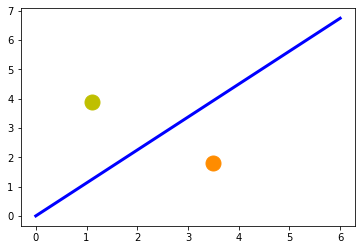

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7) # pour generer un ensemble de points sur la quelle la ligne demarcation passe 
fig, ax = plt.subplots()
ax.plot(3.5, 1.8, "or", color="darkorange", markersize=15) # Affichage du premier fruit
ax.plot(1.1, 3.9, "oy",markersize=15) # Affichage du deuxieme fruit
point_on_line = (4, 4.5)
# calculate gradient:
m = point_on_line[1] / point_on_line[0] # calcule de la pente pour tracer la droite
ax.plot(X, m * X, "b", linewidth=3)
plt.show()

Maintenant comment savoir à partir des coordonees d'un point s'il est en dessus ou en dessous de la ligne de separation ?


In [ ]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4
# check if orange is below the line,
# positive value is expected, according to the demonstrations made in the tutorial:
print(orange[0] * m - orange[1])

# check if lemon is above the line,
# negative value is expected, according to the demonstrations made in the tutorial:
print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


On peut donc constater que l'orange est en dessous de la ligne(car x*m - y > 0) et le citron en dessus de la ligne (car x*m - y < 0)

Nous allons charger plusieurs fruits : oranges et citrons avec un programme Python. Nous allons créer ces deux classes en
créant au hasard des points à l'intérieur d'un cercle dont le centre et le rayon sont définis. Le code Python suivant le permet.

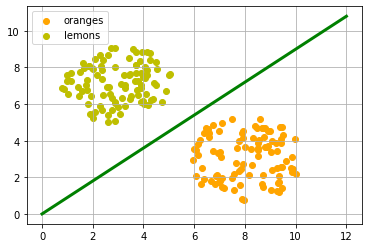

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# fonction prend en parametre un point central, le rayon de repartition, et le nombre de sample a generer
# elle retourne une liste de point (x,y)
def points_within_circle(radius, center=(0, 0), number_of_points=100):
  center_x, center_y = center
  r = radius * np.sqrt(np.random.random((number_of_points,)))
  theta = np.random.random((number_of_points,)) * 2 * np.pi
  x = center_x + r * np.cos(theta)
  y = center_y + r * np.sin(theta)
  return x, y

# ici on va donc dessiner la ligne de demarcation passant par l'origine
X = np.arange(0, 13)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(2.3, (8, 3), 100) # on genere l'ensemble des points oranges
lemons_x, lemons_y = points_within_circle(2.2, (3, 7), 100) # on genere l'ensemble des points citrons
ax.scatter(oranges_x, oranges_y, c="orange", label="oranges") # on affiche cet ensemble de fruits orange
ax.scatter(lemons_x,lemons_y, c="y", label="lemons") # on affiche cet ensemble de fruits lemons
ax.plot(X, 0.9 * X, "g-", linewidth=3) # 0n trace la ligne de demarcation passant par l'origine
ax.legend()
ax.grid()
plt.show()

Jusqu'ici nou avons desinné de facon fixe la ligne de demarcation, maintenant trouvons comment la mettre de facon systematique, juste plus à l'oeil nu.

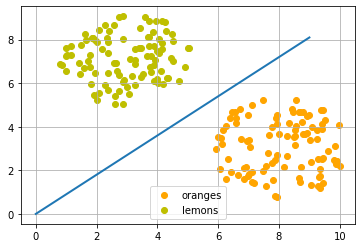

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from random import shuffle

X = np.arange(0, 10)
fig, ax = plt.subplots() # on creer la figure
# comme toujours on affiche d'abord les differents fruits, oranges et lemons
ax.scatter(oranges_x, oranges_y, c="orange", label="oranges") 
ax.scatter(lemons_x,lemons_y, c="y", label="lemons")
# on constitue le tuple des coordonnes de chaque fruits avec en quelque sorte les classes qui sont soit 0(pour les oranges) ou 1(pour les lemons)
fruits = list(zip(oranges_x, oranges_y, repeat(0, len(oranges_x))))
fruits += list(zip(lemons_x, lemons_y, repeat(1, len(oranges_x))))
shuffle(fruits) # ensuite on melange, afin d'avoir un jeu de donnees melangé.

# ici, cette fonction permet d'ajuster la pente au fur et a mesure qu'on a une nouvelle donnee.
# si le point qui represente le fruit est en haut et qu'il devait etre en bas, on decremente la pente, au prealable fixee aleatoirement, et vice versa
def adjust(learning_rate=0.3, slope=0.3):
  line = None
  counter = 0
  for x, y, label in fruits:
    res = slope * x - y
    #print(label, res)
    if label == 0 and res < 0:
      # point is above line but should be below
      # => increment slope
      slope += learning_rate
      counter += 1
      # ax.plot(X, slope * X, linewidth=2, label=str(counter))
    elif label == 1 and res > 0:
      # point is below line but should be above
      # => decrement slope
      #print(res, label)
      slope -= learning_rate
      counter += 1
      ax.plot(X, slope * X, linewidth=2, label=str(counter))
  return slope

# on affiche maintenant la igne de demarcation avec la derniere oente calculee, que la fonction adjust() retourne
slope = adjust()
ax.plot(X, slope * X, linewidth=2)
ax.legend()
ax.grid()
plt.show()

Plus haut on a adapté le calcul de la ligne de demarcation, elle est ajustee a chaque nouvelle entree.

Voyons comment l'adaptation de la ligne de demarcation se fait sur les fruits lemons.

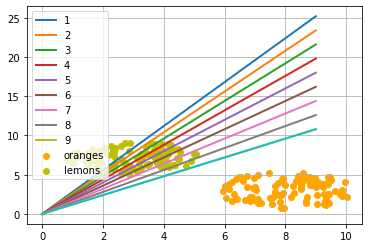

1.1999999999999995


In [ ]:
X = np.arange(0, 10)
fig, ax = plt.subplots()
ax.scatter(oranges_x, oranges_y, c="orange", label="oranges")
ax.scatter(lemons_x, lemons_y, c="y", label="lemons")
slope = adjust(learning_rate=0.2, slope=3)
ax.plot(X, slope * X, linewidth=2)

ax.legend()
ax.grid()
plt.show()
print(slope)


On voit tres bien qu'au depart , pour le premier fruit lemon, la ligne de demarcation ne classait que ce lemon, plus on envoie des fruits (lemon), plus la pente diminue et a la fin, tous les lemons sont en haut de la ligne comme ca doit etre.

Jusqu'ici nous avons su comment separer les donnees lineairement en ajustant systematiquement la ligne de demarcation, maintenant voyons quel est le rapport avec les reseaux de neurones. Nous utiliserons le perceptron simple, juste un neuronne.

 **RESEAU DE NEURONNES SIMPLE:**

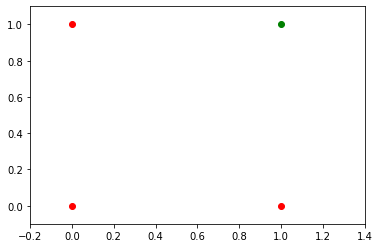

In [ ]:
# Importation des bibliotheques
import matplotlib.pyplot as plt
import numpy as np

# Generation de notre repere
fig, ax = plt.subplots()
# Generation de l'intervalle de l'axe des abscisses
xmin, xmax = -0.2, 1.4
# Organisation des valeurs de l'intervalle 
X = np.arange(xmin, xmax, 0.1)
# Generation des points constituant nos differentes classes
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
# On définit les limites de la vue sur l'axe des abscisses
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1

# Construction de notre nuage de points
plt.plot()


Dans ce bout de code, il est question de generer un repere devant contenir les nuages de points distincts, chacun devrant constituer les deux classes a separer.

[]

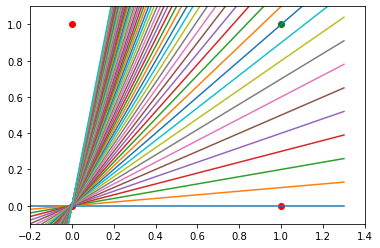

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
for m in np.arange(0, 6, 0.1):
  ax.plot(X, m*X)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
plt.plot()

Dans ce bout de code, on crée plusieurs separateurs lineaires chacun etant sous la forme y=mx . Seulement, on constate qu'aucune des lignes generees ne peut etre utilisee comme frontiere de decision car ne separant pas les elements de chacune de nos classes.

[]

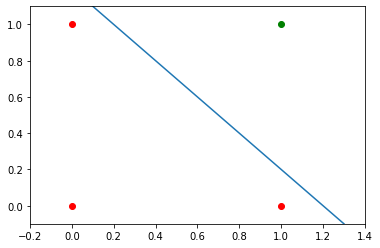

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m,c = -1,1.2
ax.plot(X, m*X+c)
plt.plot()


Ici, on a modifie le bout de code precedent celui-ci, afin de generer un bon separateur des elements de nos deux classes. 
Pour rendre ceci possible, le separateur lineaire precendent ayant la forme y=mx a ete ajuste sous forme y=mx+c ou c, l'ordonnee a l'origine est differente de 0.

In [ ]:
import numpy as np
from collections import Counter

# On cree un classe perceptron
class Perceptron:
  def __init__ (self, weigths, bias=1, learning_rate=0.3):
    # Initialisation de nos variables
    self.weights = np.array(weights)
    self.bias = bias
    self.learning_rate = learning_rate

  def unit_step_function(x):
    if x <= 0:
      return 0
    else:
      return 1

  def __call__(self, in_data):
    in_data = np.concatenate( (in_data, [self.bias]) )
    result = self.weights @ in_data
    return Perceptron.unit_step_function(result)

  def adjust(self, target_result, in_data):
    if type(in_data) != np.ndarray:
      in_data = np.array(in_data) 
    calculated_result = self(in_data)
    error = target_result - calculated_result
    if error != 0:
      in_data = np.concatenate( (in_data, [self.bias]) )
      correction = error * in_data * self.learning_rate
      self.weights += correction

  def evaluate(self, data, labels):
    evaluation = Counter()
    for sample, label in zip(data, labels):
      # Ont fait la prediction
      result = self(sample) 
      if result == label:
        evaluation["correct"] += 1
      else:
        evaluation["wrong"] += 1
    return evaluation

#

In [ ]:
import numpy as np
from collections import Counter
import numpy as np

# On cree un classe perceptron
class Perceptron:
  def __init__ (self, weigths, bias=1, learning_rate=0.3):
    # Initialisation de nos variables
    self.weigths = np.array(weigths)
    self.bias = bias
    self.learning_rate = learning_rate

  def unit_step_function(x):
    if x <= 0:
      return 0
    else:
      return 1

  def __call__(self, in_data):
    in_data = np.concatenate( (in_data, [self.bias]) )
    result = self.weigths @ in_data
    return Perceptron.unit_step_function(result)

  def adjust(self, target_result, in_data):
    if type(in_data) != np.ndarray:
      in_data = np.array(in_data) 
    calculated_result = self(in_data)
    error = target_result - calculated_result
    if error != 0:
      in_data = np.concatenate( (in_data, [self.bias]) )
      correction = error * in_data * self.learning_rate
      self.weigths += correction

  def evaluate(self, data, labels):
    evaluation = Counter()
    for sample, label in zip(data, labels):
      # Ont fait la prediction
      result = self(sample) 
      if result == label:
        evaluation["correct"] += 1
      else:
        evaluation["wrong"] += 1
    return evaluation

def labelled_samples(n):
  for _ in range(n):
    s = np.random.randint(0, 2, (2,))
    yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)
  
p = Perceptron(weigths=[0.3, 0.3, 0.3],learning_rate=0.2)
  
for in_data, label in labelled_samples(30):
  p.adjust(label, in_data)
  test_data, test_labels = list(zip(*labelled_samples(30)))
  evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'correct': 30})


AttributeError: ignored

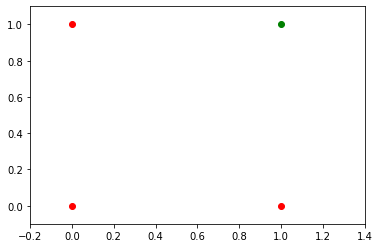

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m*X+c)
plt.plot()

#

In [ ]:
# Importation du module qui va aider a generer les elements de nos classes
from sklearn.datasets import make_blobs

n_samples = 250 #Nombre d'echantillons
# Generation pour chacune des classes, les echantillons et labels associes ainsi que leur centre
samples, labels = make_blobs(n_samples, centers=([2.5, 3], [6.7, 7.9]), random_state=0)

Dans ce bout de code, il est question de créer un autre exemple avec des ensembles de données linéairement séparables, qui aura besoin d'un nœud de biais afin de devenir séparables. La fonction make_blobs de sklearn.datasets ainsi utilisee va permettre de générer des blobs gaussiens isotropes pour le clustering.



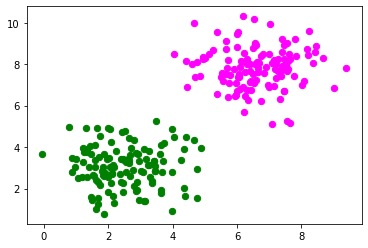

In [ ]:
import matplotlib.pyplot as plt

colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()

for n_class in range(2):
  ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], c=colours[n_class], s=40, label=str(n_class))

Dans cette partie, il est question de visualiser les donnees generees dans le bout de code precedent celui-ci

In [ ]:
# On extrait 80% des points de donnees generes
n_learn_data = int(n_samples * 0.8) 
learn_data, test_data = samples[:n_learn_data], samples[-n_learn_data:]
learn_labels, test_labels = labels[:n_learn_data], labels[-n_learn_data:]

from perceptrons import Perceptron
p = Perceptron(weights=[0.3, 0.3, 0.3],
learning_rate=0.8)
for sample, label in zip(learn_data, learn_labels):
  p.adjust(label, sample)
  evaluation = p.evaluate(learn_data, learn_labels)
print(evaluation)

ModuleNotFoundError: ignored

NameError: ignored

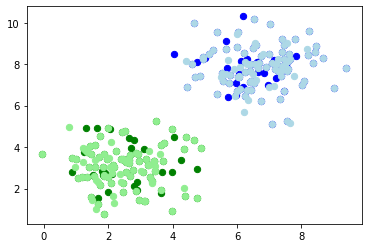

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
colours = ('green', 'blue')

for n_class in range(2):
  ax.scatter(learn_data[learn_labels==n_class][:, 0], learn_data[learn_labels==n_class][:, 1],
            c=colours[n_class], s=40, label=str(n_class))
# Construction des donnees de test

colours = ('lightgreen', 'lightblue')
for n_class in range(2):
  ax.scatter(test_data[test_labels==n_class][:, 0], test_data[test_labels==n_class][:, 1], 
             c=colours[n_class], s=40, label=str(n_class))
X = np.arange(np.max(samples[:,0]))
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()  


**ENTRAINEMENT** **D**'**UN** **RESEAU** **DE** **NEURONE** **AVEC** **PYTHON**

In [ ]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:

  #On cree le reseau de neurone en definissant son nombres de neurones en entrée , son nombre de neurone en sortie , son nombre de neurone dans la couche cachée et son taux d'apprentissage
  def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate):
    self.no_of_in_nodes = no_of_in_nodes
    self.no_of_out_nodes = no_of_out_nodes
    self.no_of_hidden_nodes = no_of_hidden_nodes
    self.learning_rate = learning_rate
    self.create_weight_matrices()

  # Methode qui initialise les poids du reseau de neurone  
  def create_weight_matrices(self):
    rad = 1 / np.sqrt(self.no_of_in_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
    rad = 1 / np.sqrt(self.no_of_hidden_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes))

  # Methode qui fait l'entrainement du reseau de neurone en faisant le calcul des erreurs et l'ajustement des differents poids 
  def train(self, input_vector, target_vector):
    # On se rassure que les vecteurs input_vector et target_vector ont la bonne forme
    input_vector = np.array(input_vector)
    input_vector = input_vector.reshape(input_vector.size, 1)
    target_vector = np.array(target_vector).reshape(target_vector.size, 1)

    output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
    output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
    output_error = target_vector - output_vector_network
    tmp = output_error * output_vector_network * (1.0 - output_vector_network)
    self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)

    # On calcule l'erreur
    hidden_errors = self.weights_hidden_out.T @ output_error

    # On met à jour les poids initialisés plus haut
    tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
    self.weights_in_hidden += self.learning_rate * (tmp @ input_vector.T)

  #Methode qui genere les valeurs du reseau de neurone en sortie ayant  un vecteur des valeurs d'entrée 
  def run(self, input_vector):
  
    # On se rassure que le vecteur en entrée soit un vecteur colonne:
    input_vector = np.array(input_vector)
    input_vector = input_vector.reshape(input_vector.size, 1)

    input4hidden = activation_function(self.weights_in_hidden@ input_vector)
    output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
    return output_vector_network

  # Methode d'evaluation du reseau de neurone en retournant le nombre d'observation qu'il a correctement classé et le nombre d'observation qu'il n'a pas correctement classé
  def evaluate(self, data, labels):
    
    corrects, wrongs = 0, 0
    for i in range(len(data)):
      res = self.run(data[i])
      res_max = res.argmax()
      if res_max == labels[i].argmax():
        corrects += 1
      else:
        wrongs += 1
    return corrects, wrongs



Ce code python contient la definition d'un reseau de neurone et les differentes methodes(run,evaluate,create_weight_matrices,train) permettant d'y effectuer toutes les operations necessaires pour mener à bien sa construction.
Ce code sera stocker dans un fichier neural_networks1.py qui sera utilisé dans des codes plus bas

In [3]:
# On génère un jeu de donnée de 500 observations divisé en 3 groupes , chaque groupe correspondant à une classe 
from sklearn.datasets import make_blobs
n_samples = 500
blob_centers = ([2, 6], [6, 2], [7, 7])
n_classes = len(blob_centers)
data, labels = make_blobs(n_samples=n_samples,centers=blob_centers,random_state=7)


Ce bout de code ci dessus nous permet d'avoir un jeu de donnée d'entrainement et de test qui seront soumis à notre reseau de neurone pour test .

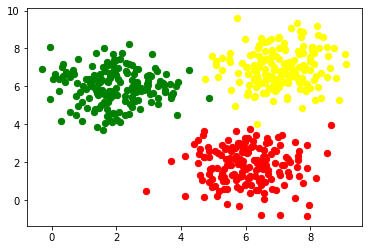

In [4]:
# Visualisation du jeu de donnée généré
import matplotlib.pyplot as plt
colours = ('green', 'red', "yellow")
fig, ax = plt.subplots()
for n_class in range(n_classes):
  ax.scatter(data[labels==n_class][:, 0],
             data[labels==n_class][:, 1],
             c=colours[n_class],
             s=40,
             label=str(n_class))

In [5]:
labels[:7]

array([2, 2, 1, 0, 2, 0, 1])

Cette ligne de code nous permet de voir les classes de 7 observations. On remarque donc que les classes sont representées dans un vecteur à une dimension.
Ce qui n'est pas une bonne representation

In [6]:
import numpy as np

labels = np.arange(n_classes) == labels.reshape(labels.size, 1)
labels = labels.astype(np.float)
labels[:7]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Le code ci-dessus vient ainsi pallier au problème de representation des classes du code qui précède en utilisant la methode du one-hot representation pour chaque classe. De ce fait chaque classe est donc representé par un vecteur de 3 dimensions (avec un element à 1 et le reste à 0) vue qu'on a 3 classes

In [7]:
from sklearn.model_selection import train_test_split

res = train_test_split(data, labels,train_size=0.8,test_size=0.2,random_state=42) # Division du jeu de donnée en 2 : 80% pour l'entrainement et 20% pour le test
train_data, test_data, train_labels, test_labels = res
train_labels[:10] # On affiche les classes des 10 premières observatiobs du jeu d'entrainement

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

Avec le code ci-dessus nous divisions notre jeu de donnée en 2: le jeu d'entrainement qui represente 80% du jeu de donnée initial et le jeu de test qui lui represente 20%

In [8]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:

  #On cree le reseau de neurone en definissant son nombres de neurones en entrée , son nombre de neurone en sortie , son nombre de neurone dans la couche cachée et son taux d'apprentissage
  def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate):
    self.no_of_in_nodes = no_of_in_nodes
    self.no_of_out_nodes = no_of_out_nodes
    self.no_of_hidden_nodes = no_of_hidden_nodes
    self.learning_rate = learning_rate
    self.create_weight_matrices()

  # Methode qui initialise les poids du reseau de neurone  
  def create_weight_matrices(self):
    rad = 1 / np.sqrt(self.no_of_in_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
    rad = 1 / np.sqrt(self.no_of_hidden_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes))

  # Methode qui fait l'entrainement du reseau de neurone en faisant le calcul des erreurs et l'ajustement des differents poids 
  def train(self, input_vector, target_vector):
    # On se rassure que les vecteurs input_vector et target_vector ont la bonne forme
    input_vector = np.array(input_vector)
    input_vector = input_vector.reshape(input_vector.size, 1)
    target_vector = np.array(target_vector).reshape(target_vector.size, 1)

    output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
    output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
    output_error = target_vector - output_vector_network
    tmp = output_error * output_vector_network * (1.0 - output_vector_network)
    self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)

    # On calcule l'erreur
    hidden_errors = self.weights_hidden_out.T @ output_error

    # On met à jour les poids initialisés plus haut
    tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
    self.weights_in_hidden += self.learning_rate * (tmp @ input_vector.T)

  #Methode qui genere les valeurs du reseau de neurone en sortie ayant  un vecteur des valeurs d'entrée 
  def run(self, input_vector):
  
    # On se rassure que le vecteur en entrée soit un vecteur colonne:
    input_vector = np.array(input_vector)
    input_vector = input_vector.reshape(input_vector.size, 1)

    input4hidden = activation_function(self.weights_in_hidden@ input_vector)
    output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
    return output_vector_network

  # Methode d'evaluation du reseau de neurone en retournant le nombre d'observation qu'il a correctement classé et le nombre d'observation qu'il n'a pas correctement classé
  def evaluate(self, data, labels):
    
    corrects, wrongs = 0, 0
    for i in range(len(data)):
      res = self.run(data[i])
      res_max = res.argmax()
      if res_max == labels[i].argmax():
        corrects += 1
      else:
        wrongs += 1
    return corrects, wrongs



# On cree un reseau de neurone avec 2 neurones en entrée , 3 en sortie ,5 dans la couche cachée et ayant un taux d'apprentissage de 0.3 ceci à l'aide du fichier neural_networks1.py dont le code a été ecrit plus haut 
#from neural_networks1 import NeuralNetwork

simple_network = NeuralNetwork(no_of_in_nodes=2,
                               no_of_out_nodes=3,
                               no_of_hidden_nodes=5,
                               learning_rate=0.3)

#On soumet donc ce reseau de neurone à l'apprentissage avec le jeu de donnée généré plus haut
for i in range(len(train_data)):
  simple_network.train(train_data[i], train_labels[i])

#On passe à l'evaluation du reseau de neurone
simple_network.evaluate(train_data, train_labels)

(390, 10)

In [9]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:

  #On cree le reseau de neurone en definissant son nombres de neurones en entrée , son nombre de neurone en sortie , son nombre de neurone dans la couche cachée , son taux d'apprentissage et cette fois en tenant compte d'eventuels noeuds biais
  def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate,bias=None):
    self.no_of_in_nodes = no_of_in_nodes
    self.no_of_out_nodes = no_of_out_nodes
    self.no_of_hidden_nodes = no_of_hidden_nodes
    self.learning_rate = learning_rate
    self.bias = bias
    self.create_weight_matrices()

  # Methode qui initialise les poids du reseau de neurone en tenant compte d'un eventuel noeud biais
  def create_weight_matrices(self):
    bias_node = 1 if self.bias else 0
    rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes + bias_node))
    rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes + bias_node))

  def train(self, input_vector, target_vector):
    # On s'assure que les vecteurs ont la forme correcte
    input_vector = np.array(input_vector)
    input_vector = input_vector.reshape(input_vector.size, 1)
    if self.bias:
      # s'il y'a un noeud biais on l'ajoute à la fin du vecteur d'entré
      input_vector = np.concatenate( (input_vector, [[self.bias]]) )
    target_vector = np.array(target_vector).reshape(target_vector.size, 1)
    output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
    if self.bias:
      # s'il y'a un noeud biais on l'ajoute à la fin du vecteur de la couche cachée
      output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
    output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
    output_error = target_vector - output_vector_network
    # Mise à jour des poids:
    tmp = output_error * output_vector_network * (1.0 - output_vector_network)
    self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
    # Calcul de l'erreur
    hidden_errors = self.weights_hidden_out.T @ output_error
    # Mise à jour des poids
    tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
    if self.bias:
      x = (tmp @input_vector.T)[:-1,:]  
    else:
      x = tmp @ input_vector.T
    self.weights_in_hidden += self.learning_rate * x

  #Methode qui genere les valeurs du reseau de neurone en sortie ayant  un vecteur des valeurs d'entrée prenant n compte la presence d'eventuel noeud biais
  def run(self, input_vector):
    # On s'assure que le vecteur d'entrée soit un vecteur colonne
    input_vector = np.array(input_vector)
    input_vector = input_vector.reshape(input_vector.size, 1)
    if self.bias:
      # s'il y'a un noeud biais on l'ajoute à la fin du vecteur d'entré
      input_vector = np.concatenate( (input_vector, [[1]]) )
    input4hidden = activation_function(self.weights_in_hidden @ input_vector)
    if self.bias:
      input4hidden = np.concatenate( (input4hidden, [[1]]) )
    output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
    return output_vector_network               

  # Methode d'evaluation du reseau de neurone en retournant le nombre d'observation qu'il a correctement classé et le nombre d'observation qu'il n'a pas correctement classé
  def evaluate(self, data, labels):
    corrects, wrongs = 0, 0
    for i in range(len(data)):
      res = self.run(data[i])
      res_max = res.argmax()
      if res_max == labels[i].argmax():
        corrects += 1
      else:
        wrongs += 1
    return corrects, wrongs




#from neural_networks2 import NeuralNetwork
# On cree un reseau de neurone avec 2 neurones en entrée , 3 en sortie ,5 dans la couche cachée et ayant un taux d'apprentissage de 0.1 avec la presence d'un noeud biais ceci à l'aide du fichier neural_networks2.py 
simple_network = NeuralNetwork(no_of_in_nodes=2,
                no_of_out_nodes=3,
                no_of_hidden_nodes=5,
                learning_rate=0.1,
                bias=1)

#On soumet donc ce reseau de neurone à l'apprentissage avec le jeu de donnée généré plus haut
for i in range(len(train_data)):
  simple_network.train(train_data[i], train_labels[i])

#On passe à l'evaluation du reseau de neurone  
simple_network.evaluate(train_data, train_labels)

(387, 13)

Ce code python contient la definition d'un reseau de neurone et les differentes methodes(run,evaluate,create_weight_matrices,train) permettant d'y effectuer toutes les operations necessaires pour mener à bien sa construction avec la particularité de prendre en consideration  le cas de presence de noeud biais.
Ce code sera stocker dans un fichier neural_networks2.py qui sera utilisé dans le code qui suit